<a href="https://colab.research.google.com/github/atulpatil2228/Pw_ML_learning/blob/main/multicollinearity_detection_and_remedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data  = fetch_california_housing()

In [ ]:
df = pd.DataFrame(data.data,columns = data.feature_names)
df['price'] = data.target

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
## multicollinarity >> when one feature is explained by all ohter features (more than 2)
## when two features >> corr
## more than two features relationship >>.VIF ,clustermap

<Axes: >

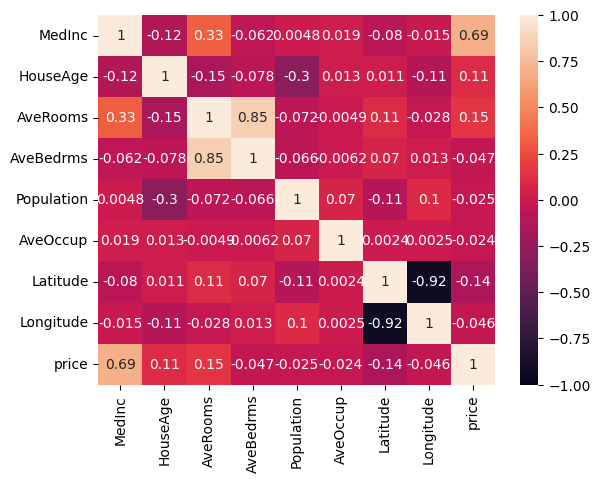

In [ ]:
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

<Figure size 500x500 with 0 Axes>

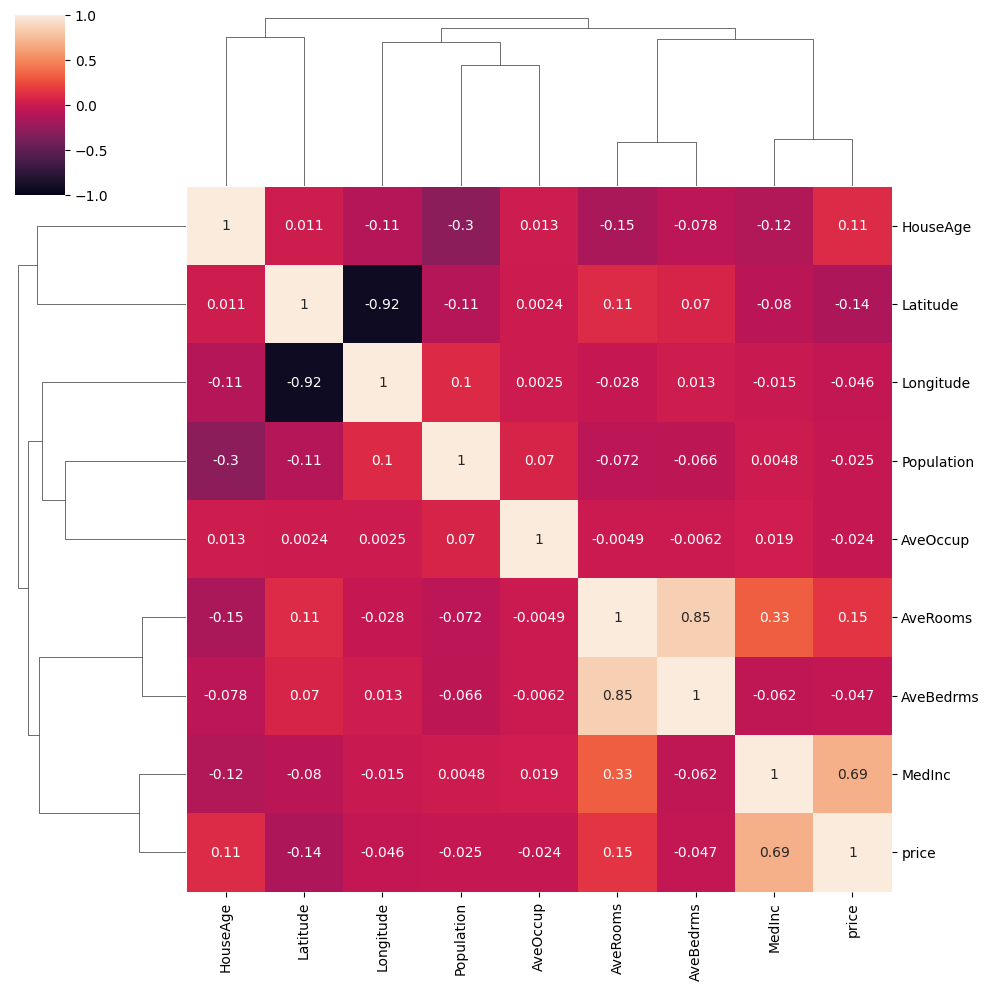

In [ ]:
## cluster map table>> t shows group(cluster )relationship
plt.figure(figsize=(5,5))
sns.clustermap(df.corr(),vmin = -1,vmax = 1,annot = True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif['Features'] = df.columns

In [ ]:
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

In [ ]:
vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]

In [ ]:
df.values

array([[   8.3252    ,   41.        ,    6.98412698, ...,   37.88      ,
        -122.23      ,    4.526     ],
       [   8.3014    ,   21.        ,    6.23813708, ...,   37.86      ,
        -122.22      ,    3.585     ],
       [   7.2574    ,   52.        ,    8.28813559, ...,   37.85      ,
        -122.24      ,    3.521     ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,   39.43      ,
        -121.22      ,    0.923     ],
       [   1.8672    ,   18.        ,    5.32951289, ...,   39.43      ,
        -121.32      ,    0.847     ],
       [   2.3886    ,   16.        ,    5.25471698, ...,   39.37      ,
        -121.24      ,    0.894     ]])

In [ ]:
vif

,Features,VIF
0,MedInc,19.624998
1,HouseAge,7.592663
2,AveRooms,47.956351
3,AveBedrms,45.358192
4,Population,2.936078
5,AveOccup,1.099530
6,Latitude,568.497332
7,Longitude,640.064211
8,price,9.285659


In [ ]:
df1 = df.copy()

In [ ]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
df1.drop('Longitude',axis = 1,inplace = True)

In [ ]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,0.847


In [ ]:
vif = pd.DataFrame()
vif['Features'] = df1.columns

In [ ]:
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

In [ ]:
vif

,Features,VIF
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,price,9.193500


In [ ]:
df1.drop('AveRooms',axis = 1,inplace = True)

In [ ]:
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

In [ ]:
vif

,Features,VIF
0,MedInc,10.584081
1,HouseAge,7.260588
2,AveBedrms,6.440667
3,Population,2.762794
4,AveOccup,1.098719
5,Latitude,22.094483
6,price,8.674858


In [ ]:
df1.drop('Latitude',axis = 1,inplace = True)

In [ ]:
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

In [ ]:
vif

,Features,VIF
0,MedInc,8.855104
1,HouseAge,4.156145
2,AveBedrms,4.264253
3,Population,2.223926
4,AveOccup,1.098671
5,price,8.607339


In [ ]:
X = df1.iloc[:, :-1] #independent var
y = df1.iloc[:, -1] #dependent variable

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)

In [ ]:
X_train

,MedInc,HouseAge,AveBedrms,Population,AveOccup
5748,2.9148,15.0,1.105532,3164.0,2.692766
5592,3.1779,41.0,1.054825,1658.0,3.635965
2110,2.5111,49.0,0.964361,1290.0,2.704403
13901,2.5405,15.0,1.422326,2568.0,2.388837
18425,4.5033,7.0,1.101173,1739.0,2.549853
...,...,...,...,...,...
10955,1.7823,17.0,1.087156,1079.0,2.474771
17289,8.5608,42.0,1.011538,753.0,2.896154
5192,1.1326,42.0,1.006826,775.0,2.645051
12172,2.6322,10.0,0.951782,1323.0,2.773585


In [ ]:
y_train

,price
5748,2.38700
5592,1.71100
2110,0.55400
13901,0.69600
18425,2.13100
...,...
10955,2.05300
17289,5.00001
5192,1.04800
12172,1.40700


In [ ]:
from sklearn.preprocessing  import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model

LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 0.8295202 ,  0.23888438,  0.02058888,  0.03902186, -0.05185743])

In [ ]:
model.intercept_

np.float64(2.0765314825581394)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1.99486815, 1.39443153, 2.46691805, ..., 1.83891855, 1.28083607,
       1.20666527])

In [ ]:
#performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.6544937093127863
0.6046846522578226
0.809007854914145


In [ ]:
score = r2_score(y_test,y_pred)

In [ ]:
score

0.502166171877851

In [ ]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5017637843672447

Implementation of RFE

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
X = df.iloc[:, :-1] #independent var
y = df.iloc[:, -1] #dependent variable

In [ ]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
## RFE >> recursive feature elimination

from sklearn.feature_selection import RFE

In [ ]:
rfe = RFE(estimator=LinearRegression(),n_features_to_select=5)

In [ ]:
rfe.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [ ]:
rfe.predict(X)

array([3.98910415, 4.03191679, 3.44103761, ..., 0.22630645, 0.36574672,
       0.57907858])

In [ ]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
rfe.support_

array([ True, False,  True,  True, False, False,  True,  True])

In [ ]:
rfe.ranking_

array([1, 2, 1, 1, 4, 3, 1, 1])